<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="house.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>LAPTOP PRICE PREDICTION
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>                                                                                

## PROBLEM STATEMENT.

The objective of this study is to develop a predictive model that can accurately estimate the price of a laptop based on various features such as brand, processor, RAM, storage, display size, graphics card, operating system, weight, and age. The model should be able to provide reliable price estimates for different types of laptops, including those from popular brands such as Apple, Dell, HP, Lenovo, etc. The proposed model should be able to help consumers and retailers make informed decisions about pricing and purchasing laptops. Additionally, the model should be evaluated and validated using appropriate metrics to ensure its accuracy and effectiveness in predicting laptop prices.

## DATA DEFINATION.

**Company:** A categorical variable indicating the brand of the laptop, such as Apple, Dell, HP, Lenovo, etc.

**TypeName:** A categorical variable indicating the type of laptop, such as gaming, ultrabook, workstation, etc.

**Inches:** A numeric variable indicating the diagonal size of the laptop's screen, measured in inches.

**ScreenResolution:**  A categorical variable indicating the resolution of the laptop screen, such as 1366x768, 1920x1080, etc.

**Cpu:** A categorical variable indicating the processor type and speed, such as Intel Core i7-7500U, AMD Ryzen 5 4500U, etc.

**Ram:** A numeric variable indicating the amount of Random Access Memory (RAM) installed in the laptop, measured in GB.

**Memory:** A categorical variable indicating the type of memory, such as DDR3, DDR4, etc.

**Gpu:** A categorical variable indicating the type of graphics card, such as Intel HD Graphics, NVIDIA GeForce, etc.

**OpSys:**  A categorical variable indicating the pre-installed operating system of the laptop, such as Windows, macOS,Linux etc

**Weight:** A numeric variable indicating the weight of the laptop, measured in pounds or kilograms.

**Price:** A numeric variable indicating the price of the laptop, measured in a specific currency (e.g., USD, EUR, etc.).




## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Prepare and Analyze the Data](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Type](#Data_Types)
        - 4.1.2 - [Summary Statistics](#Summary_Statistics)
        - 4.1.3 - [Distribution of Variables](#distribution_variables)
        - 4.1.4 - [Missing Values](#Missing_Values)
        - 4.1.5 - [Data Preparation](#Data_Preparation)
        - 4.2.1 - [Check for Normality](#Normality)
        - 4.2.2 - [Dummy Encode the Categorical Variables](#dummy)
5. **[Model Building Start](#BuildingModel)**
    - 5.1 - [Linear Regression](#KNearestNeigbour)
    - 5.2 - [Knn Model](#KNearestNeigbour)
    - 5.3 - [Decision Tree](#DecisionTree)
    - 5.4 - [Random Forest](#RF_model)
6. **[Conclusion](#conclusion)**

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
## We use 'Numpy'for mathematical operations on large, multi-dimensional arrays and matrices
# 'Pandas' is used for data manipulation and analysis
import numpy as np
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt

# seaborn is used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

import statsmodels.api as sm 

# importing train test split libraries. 
from sklearn.model_selection import train_test_split

In [118]:
# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# 15 and 8 are width and height in inches respectively
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
1. Display complete data frames<br>
2. To avoid the exponential number<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

<a id='Read_Data'></a>
# 3. Read Data

In [120]:
#Reading the DataFrame
df=pd.read_csv(r'D:\data laptop\laptop_data.csv')

# "df.head()" means checking the top five rows.
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### Lets take a glance at our dataframe and see how it looks

#### Dimensions of the data

In [121]:
# 'shape' function returns a tuple that gives the total number of rows and columns in the data
df.shape

(1303, 12)

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and perform the following tasks:<br>
                        1. Check data types. Ensure your data types are correct.<br>
                        2. We need to change the data types as per requirement If they are not as per business definition <br>
                        3. Go through the summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study the correlation<br>
                        6. Detect outliers from the data<br>
                        7. Look for the missing values<br><br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

<a id='Data_Types'></a>
### 4.1.1 Data Type
The data types in pandas dataframes are the object, float, int64, bool, and datetime64. We should know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In our dataset, we have a blend of numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check for the data type**

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [123]:
# 'dtypes' provides the data type for each column
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [124]:
#checking for missing values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We see that from the above table a column with "Unnamed" named is unneccssary, Let's Drop that table immediatly.We also see that No Null values are there.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


#### Let us now remove the Unnamed :0 column as this will not be necessary for our analysis

In [125]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [126]:
# Re-displaying the table again.
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [127]:
# To remove GB from Ram column
df['Ram'] = df['Ram'].str.replace('GB','')

In [128]:
# To remove kg from weight column
df['Weight'] = df['Weight'].str.replace('kg','')

In [129]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [130]:
#Converting the "object" variable to int type.
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].astype('float32')

In [131]:
# Now reprint the information again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


**1. For numerical variables, use the describe()**

In [132]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
#We transpose the results for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Ram,1303.0,8.382195,5.084665,2.00,4.00,8.00,8.0000,64.00
Weight,1303.0,2.038733,0.665475,0.69,1.50,2.04,2.3000,4.70
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72


<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the distribution of all the variables <br><br>
                        1. Distribution of numeric independent variables<br>
                        2. Distribution of categoric independent variables<br>
                        3. Distribution of dependent variable
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Price', ylabel='Density'>

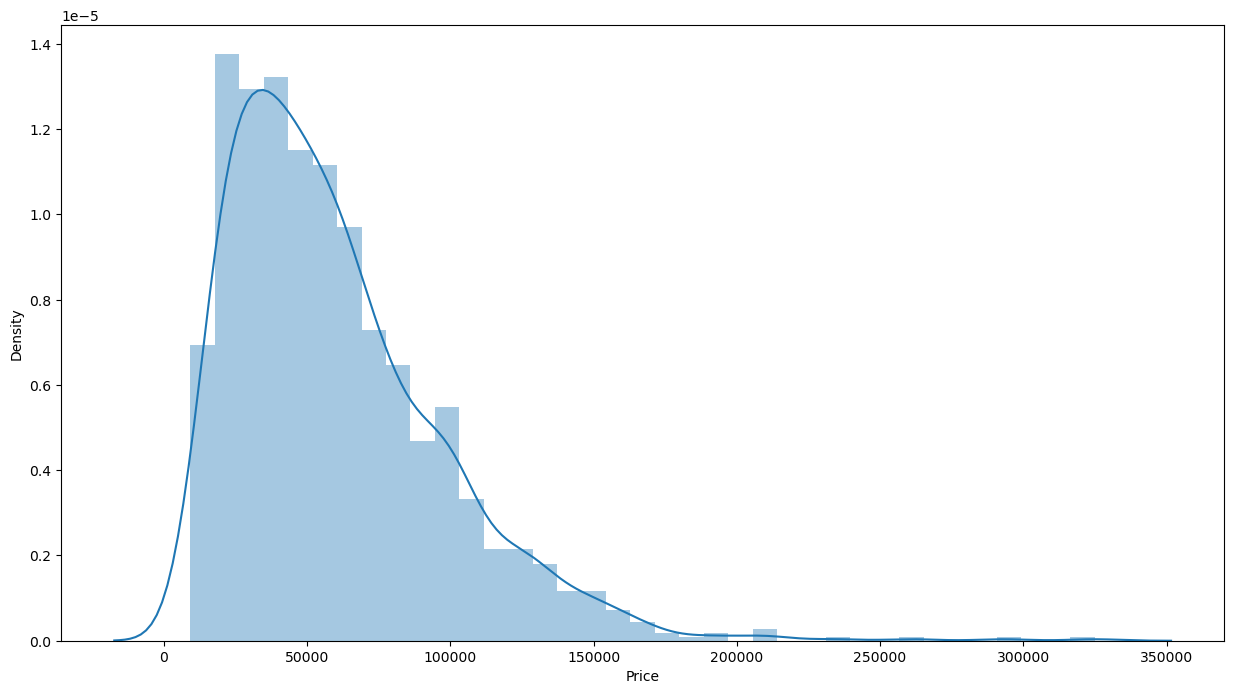

In [133]:
#create a visualization of the distribution of the variable 'Price'.
sns.distplot(df['Price'])

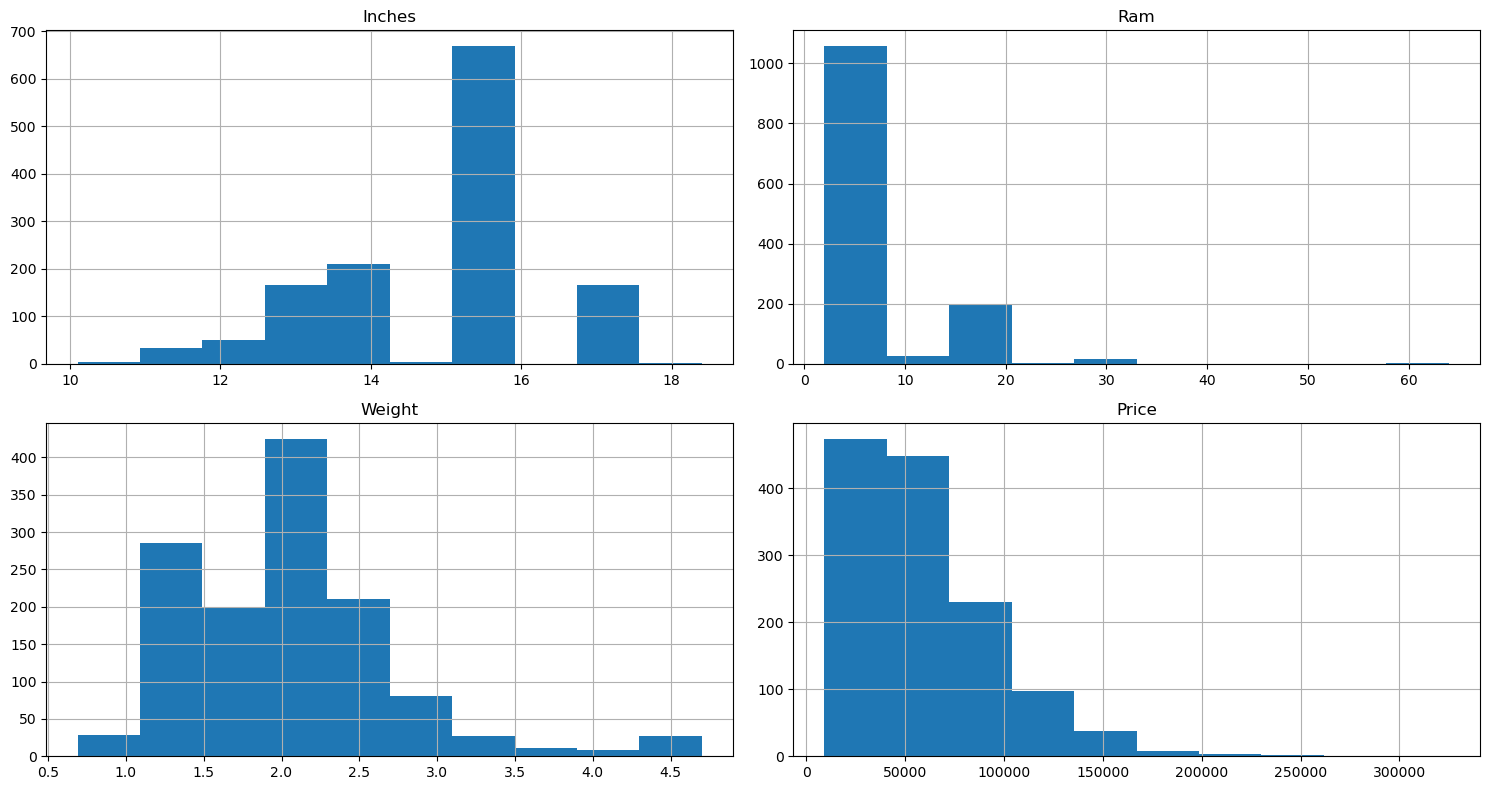

In [134]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

Here, we see that data is left skewed so we need to take it in cosideration

#### 2. Distribution of categoric independent variables.

<AxesSubplot:>

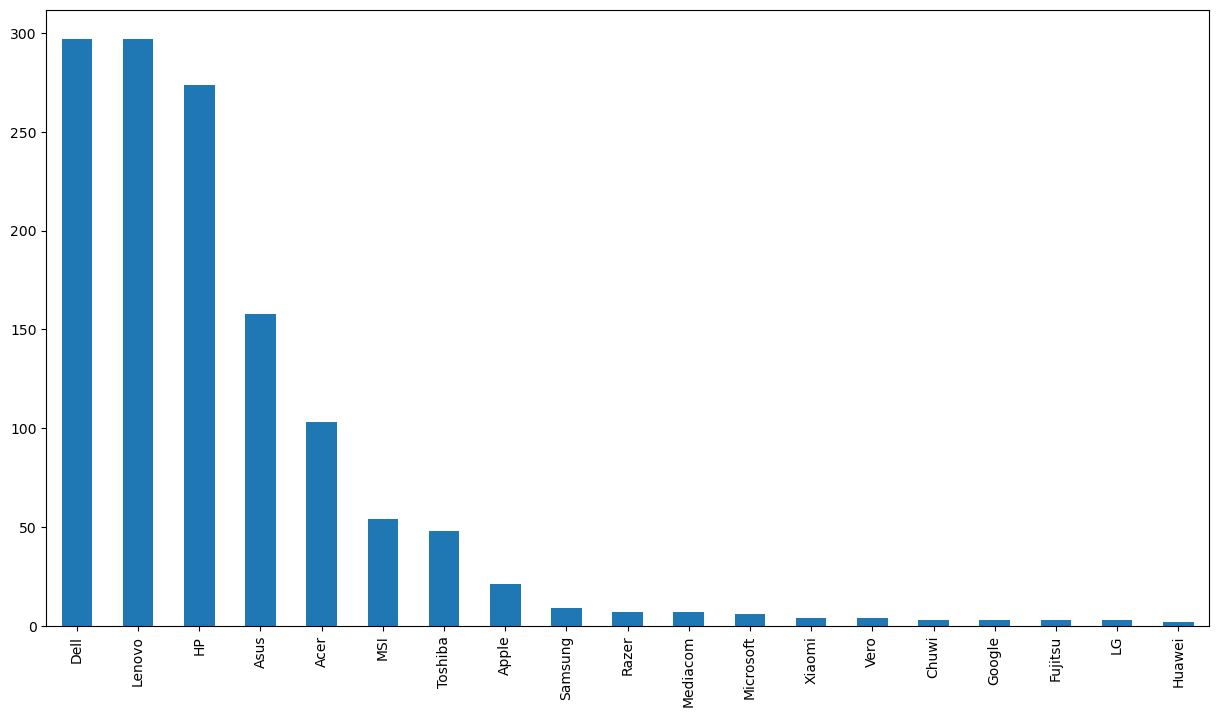

In [135]:
# Visualization for understanding the distribution of values in a categorical variable like 'Company'.
df['Company'].value_counts().plot(kind='bar')


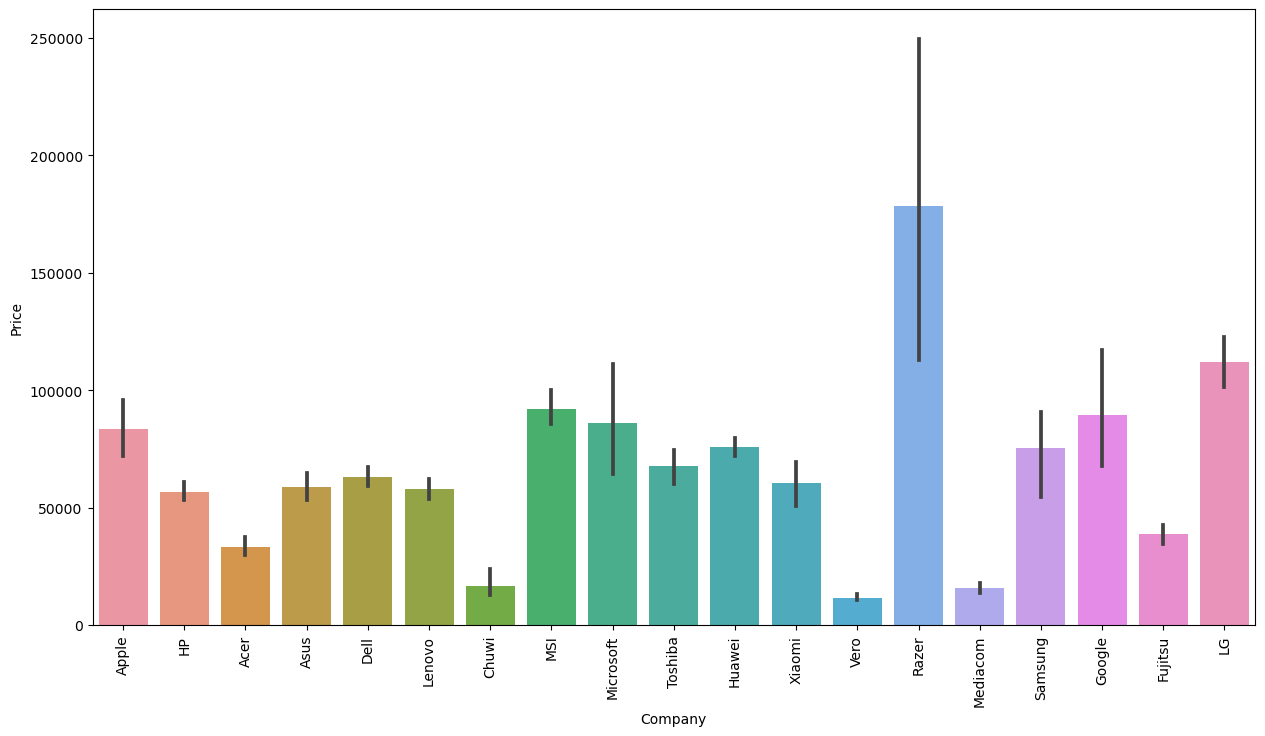

In [136]:
#Creating a bar plot where on x axis and y axis.
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')

#Display the plot
plt.show()

<AxesSubplot:>

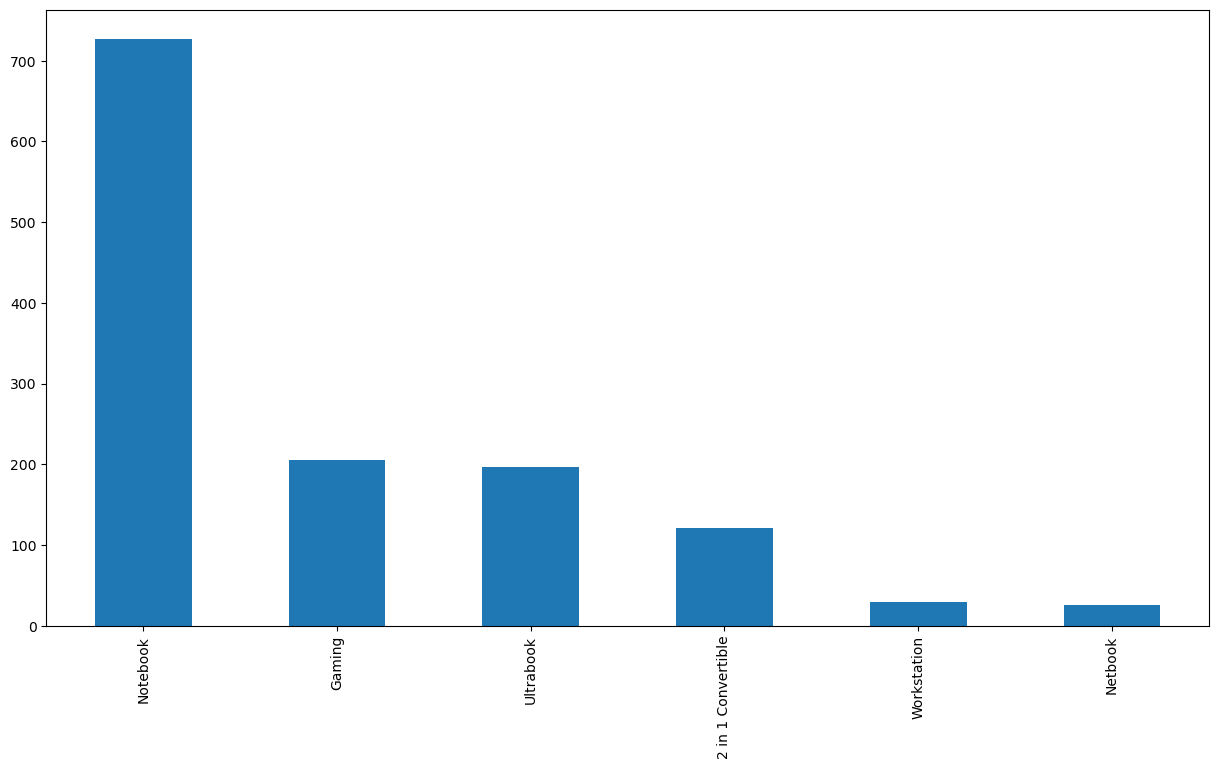

In [137]:
#creating a bar plot of the frequency distribution of the values in the 'TypeName' 
df['TypeName'].value_counts().plot(kind='bar')

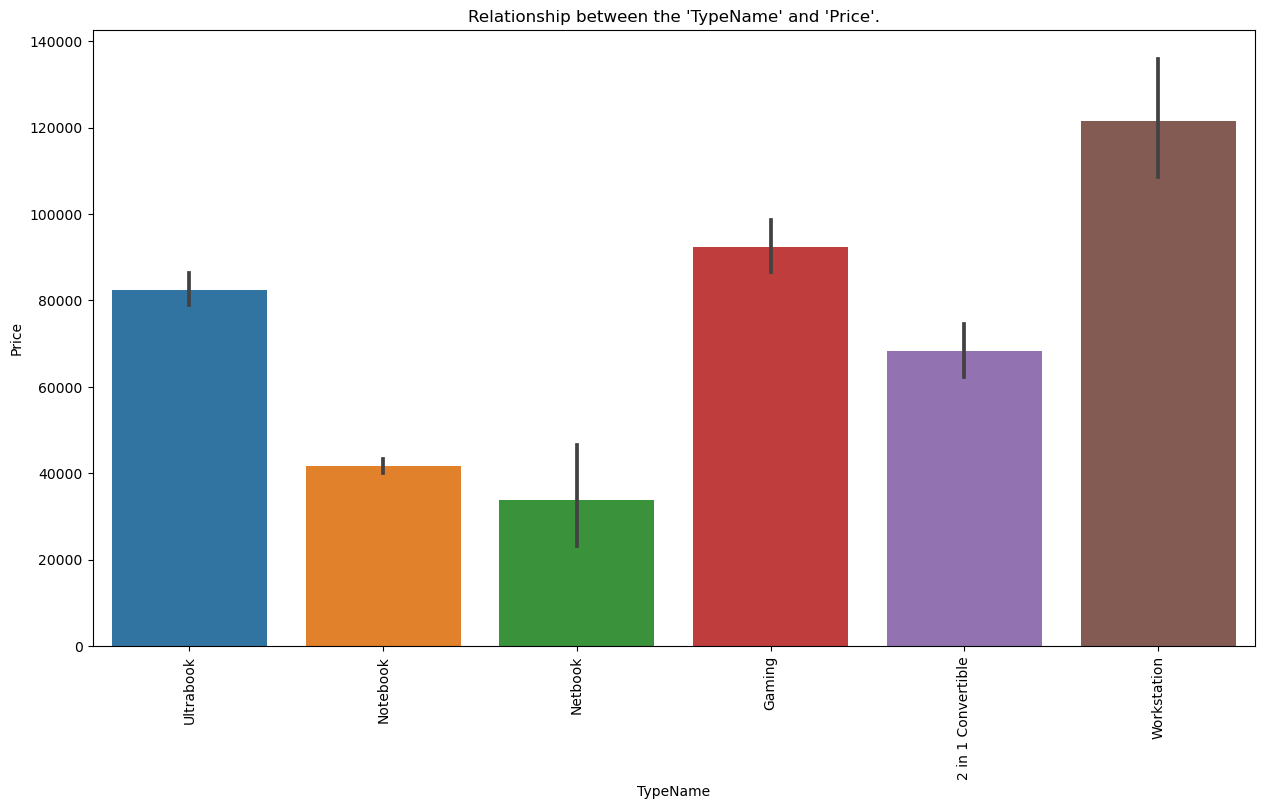

In [138]:
# creates a bar plot showing the relationship between the 'TypeName' and 'Price' columns of a pandas dataframe.
#The resulting plot shows the average price for each unique value in the 'TypeName' 

sns.barplot(x=df['TypeName'],y=df['Price'])
plt.title("Relationship between the 'TypeName' and 'Price'.")
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

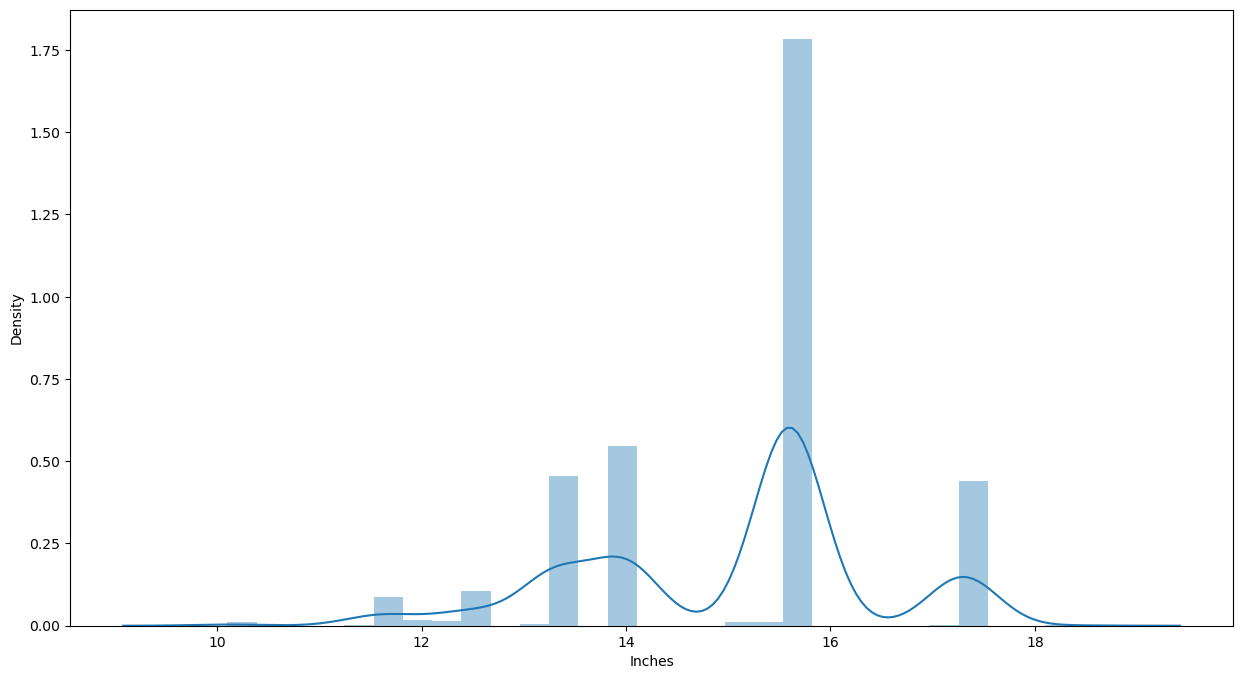

In [139]:
sns.distplot(df['Inches'])

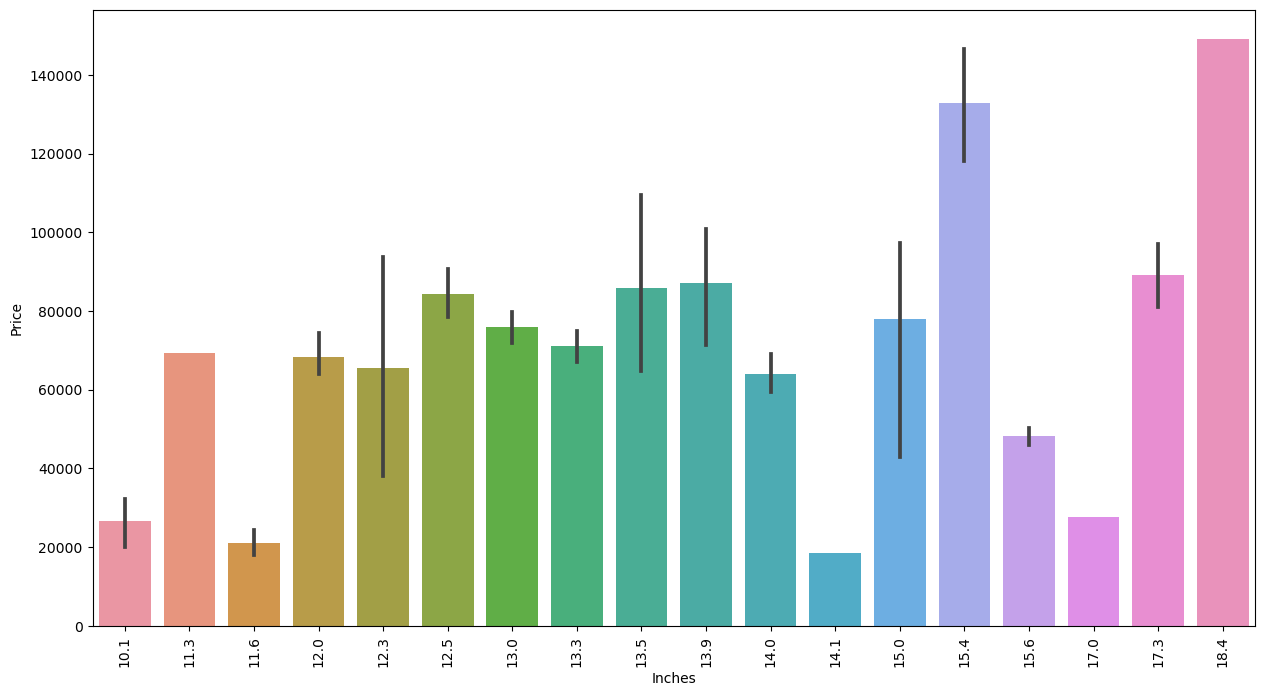

In [140]:
#creates a bar plot showing the relationship between the 'Inches' and 'Price' columns.
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [141]:
#counting the number of occurrences of each unique value in the 'Inches' 
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

<AxesSubplot:xlabel='Inches', ylabel='Price'>

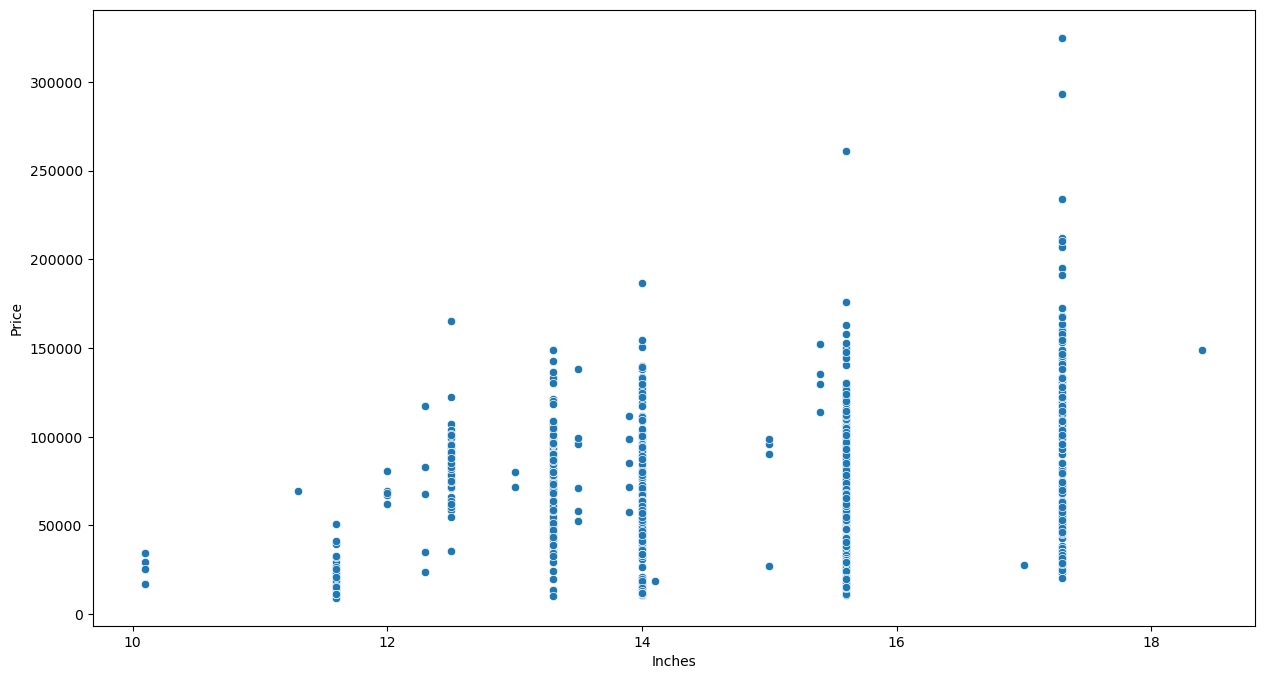

In [142]:
# Here checking the co-relation of 'inches' and 'price'
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [143]:
#Here we are displaying aviliblity of "ScreenResolution".
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Here we have some information regarding the resolution,touchscreen or not, IPS pane or not

 We see that from the above table we have some more product of "Touchscreen" and "IPS",here we need create a new column for them.

In [144]:
# Now creating a new column in "df" data frame for 'TouchScreen.'
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [145]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
19,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,52161.12,1
631,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,78801.12,0
476,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.24,0
1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.72,0
276,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,58554.72,0


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

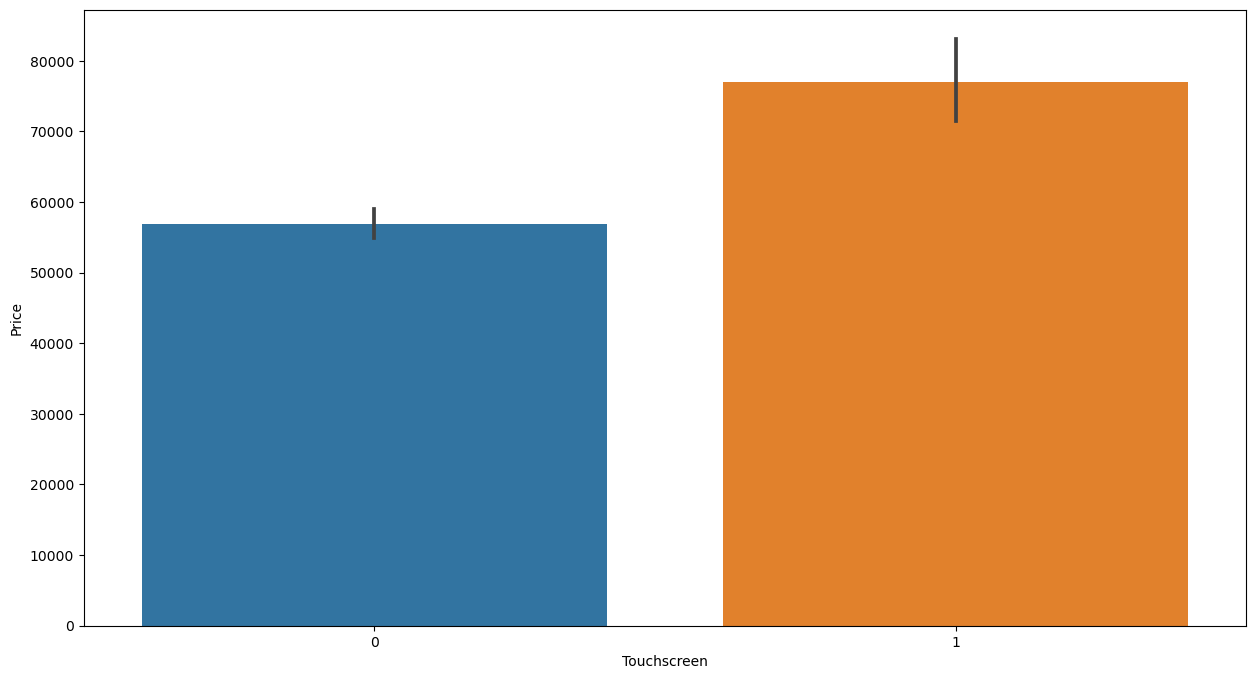

In [146]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [147]:
# Now creating a new column in "df" data frame for 'IPS.'
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS ' in x else 0)

In [148]:
#Randomly generating the dataframe to check the above code.
df.sample(5)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
1089,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.40,20619.36,0,0
830,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,292986.72,1,0
60,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,69210.72,0,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.60,0,1
742,Toshiba,Notebook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,81784.80,1,1


<AxesSubplot:>

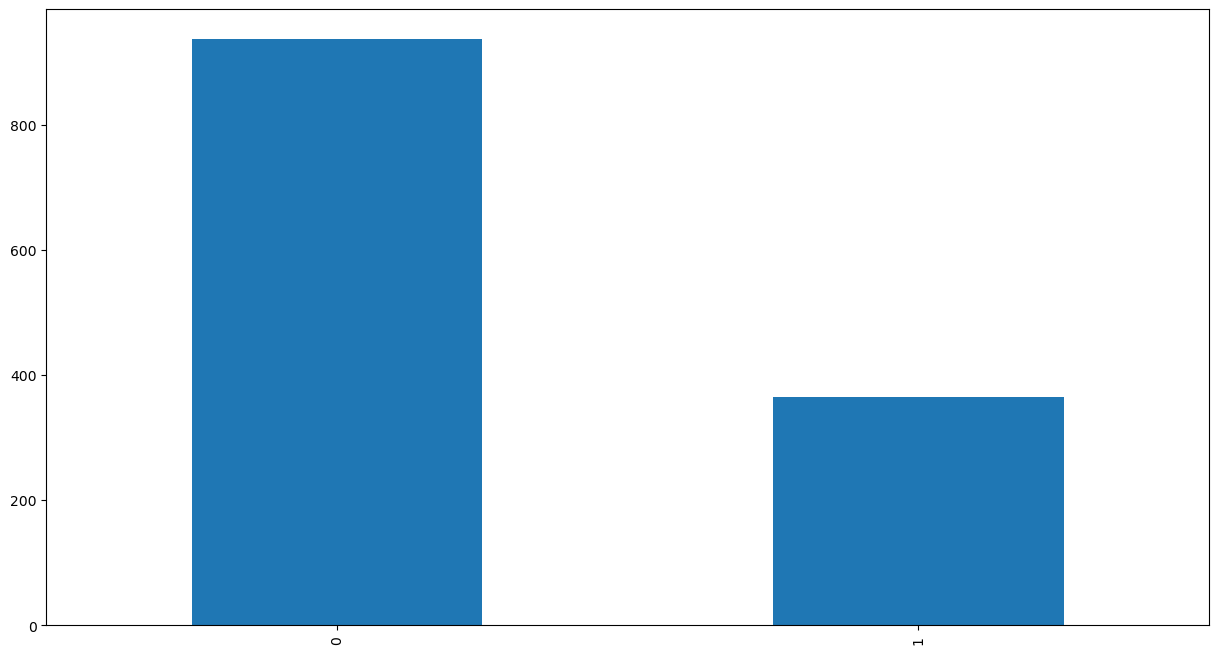

In [149]:
#Counting ips and displaying on the bar plot graph.
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

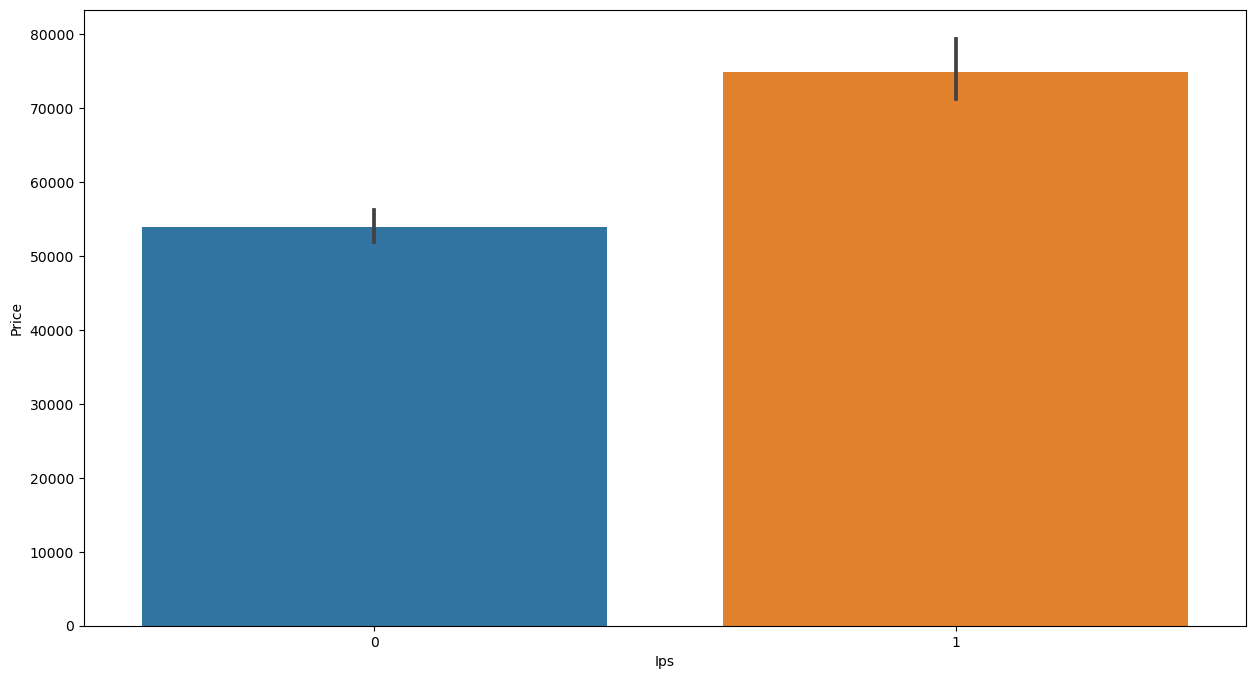

In [150]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [151]:
#Splitting the 'ScreenResolution' using str.split.putting one more col
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [152]:

df['X_res'] = new[0]
df['Y_res'] = new[1]

In [153]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


**code snippet is intended to clean and extract numerical values from the 'X_res' column. It removes commas, extracts the first numerical value found using a regular expression pattern, and updates the 'X_res' column with these cleaned values.**

In [154]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [155]:
#Checking the view of the dataframe.
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [156]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [158]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [159]:
#calculating  the pixel density of a device and creating  a new column called 'ppi' in the DataFrame df.
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [160]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [161]:
#Recheckig the corr of price.
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [162]:
df.drop('ScreenResolution',axis=1,inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [163]:
#Dropping the column.
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [164]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [165]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
Intel Core i5 6200U 2.3GHz                68
Intel Core i3 6006U 2GHz                  64
Intel Core i7 6500U 2.5GHz                49
Intel Core i7 6700HQ 2.6GHz               43
Intel Core i3 7100U 2.4GHz                37
Intel Core i5 7300HQ 2.5GHz               33
Intel Celeron Dual Core N3350 1.1GHz      30
Intel Celeron Dual Core N3060 1.6GHz      28
Intel Core i7 6600U 2.6GHz                18
Intel Core i3 6006U 2.0GHz                16
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N3710 1.6GHz      11
AMD A9-Series 9420 3GHz                   11
Intel Core i5 6300U 2.4GHz                11
Intel Celeron Dual Core N3050 1.6GHz      11
Intel Core

In [166]:
#creates a new column 'Cpu Name' in the DataFrame df, based on the 'Cpu' column.
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join (x.split()[0:3]))


In [167]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [168]:

df['Cpu Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [169]:
# Creating User-Defined function to "fetch_processor"
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

The function first checks if the input string matches any of the three Intel Core processor models ('Intel Core i7', 'Intel Core i5', or 'Intel Core i3'). If the input string matches one of these models, the function returns the input string unchanged.

If the input string does not match any of the three Intel Core processor models, the function checks if the first word of the input string is 'Intel'. If it is, the function returns the string 'Other Intel Processor'.

In [170]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [171]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [172]:

df['Cpu brand'].value_counts()


Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: Cpu brand, dtype: int64

<AxesSubplot:>

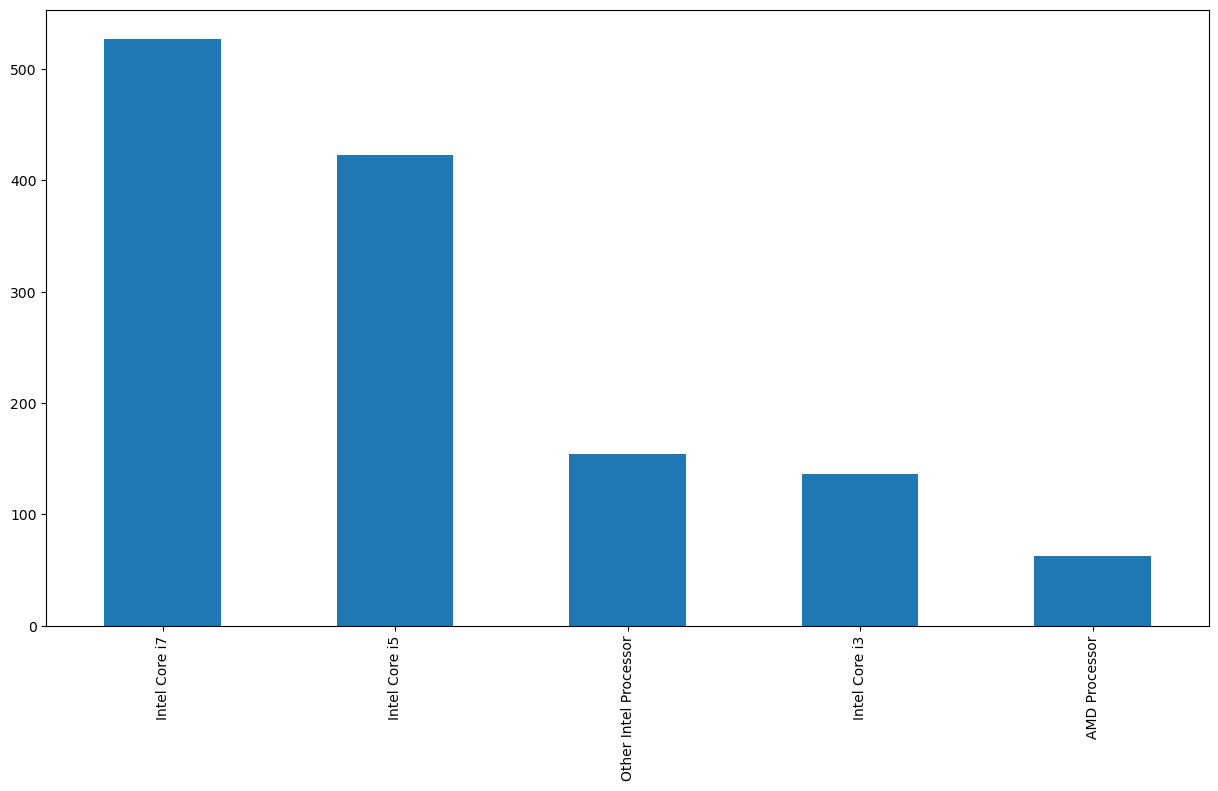

In [173]:
df['Cpu brand'].value_counts().plot(kind='bar')

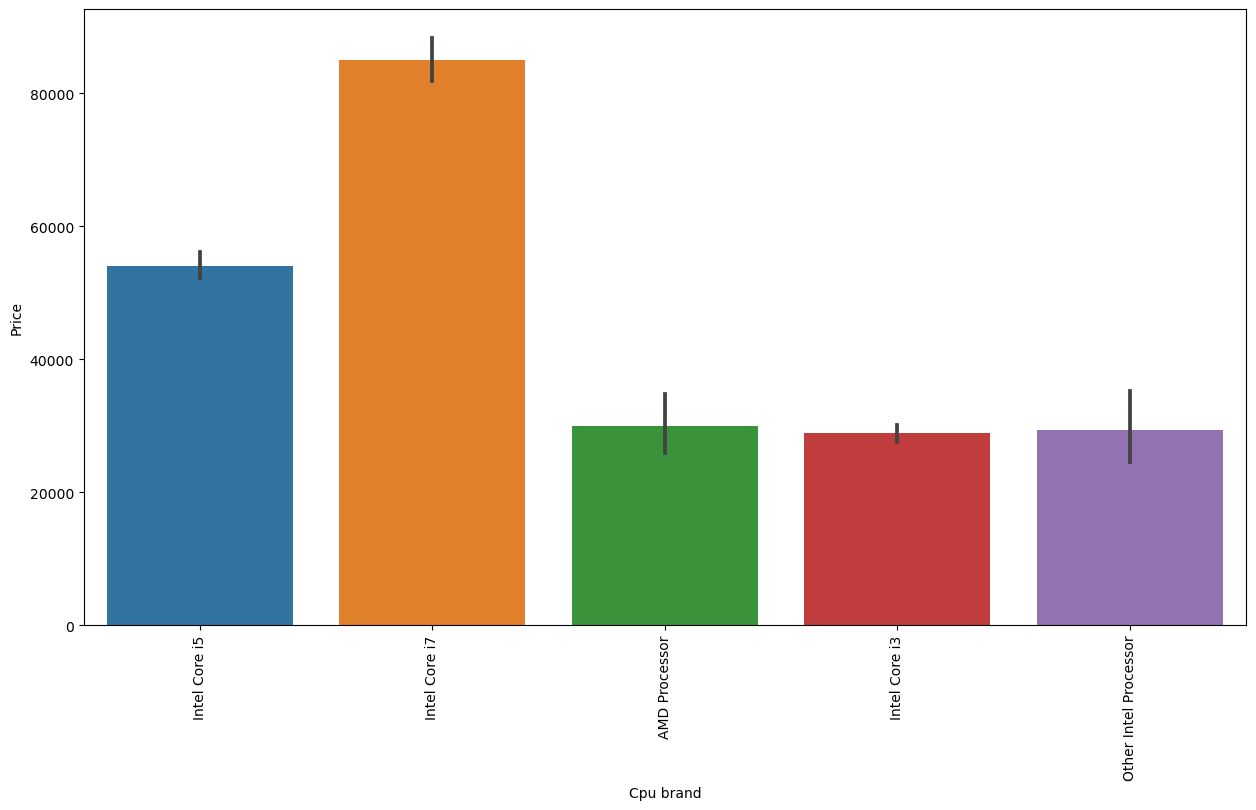

In [174]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [175]:
#droping some unwanted columns.
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [176]:
#viewing the dataframe.
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

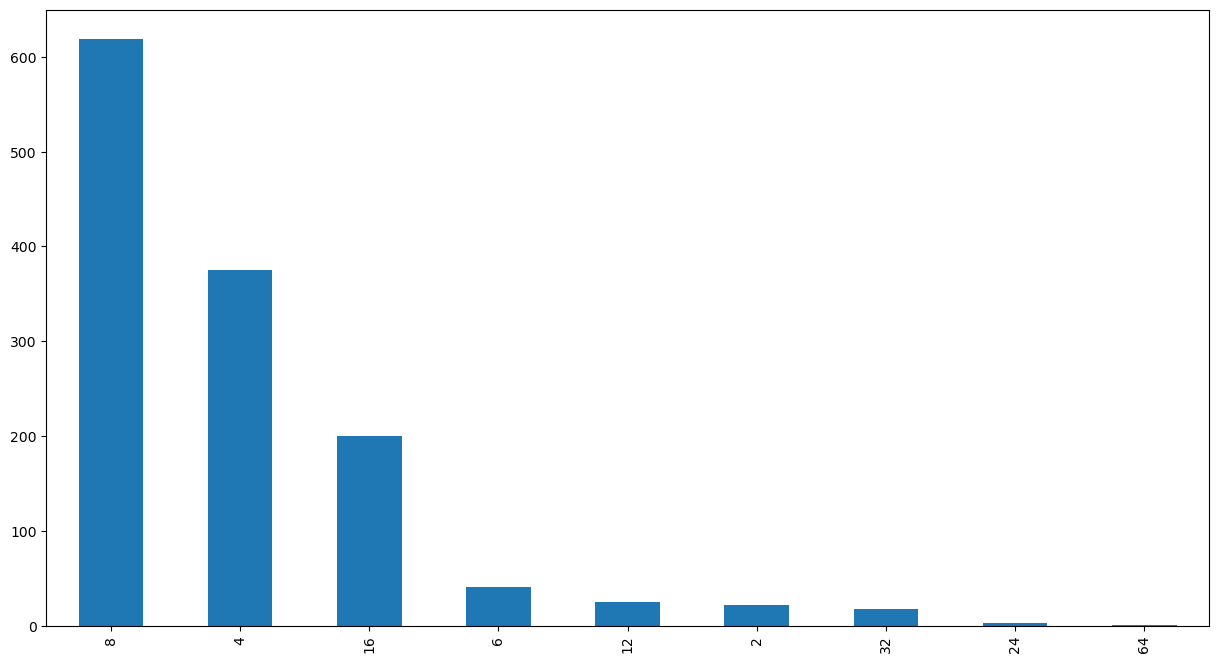

In [177]:
df['Ram'].value_counts().plot(kind='bar')

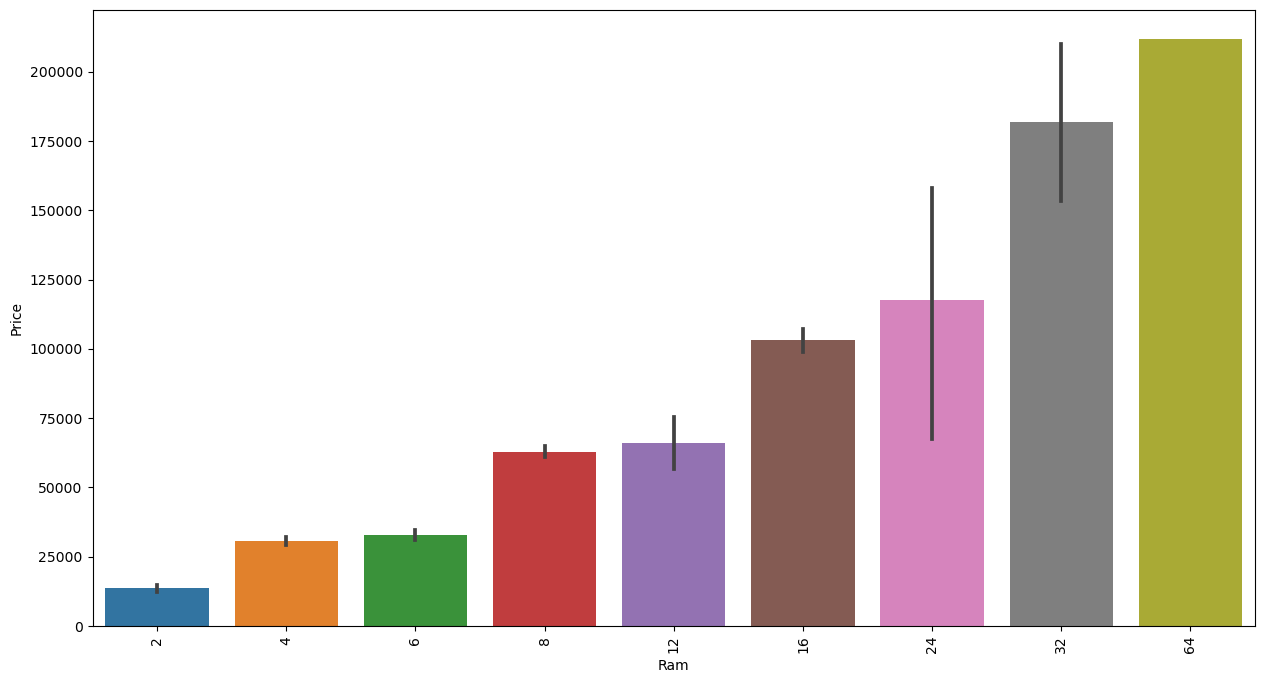

In [178]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**generated a bar plot with 'Ram' values on the x-axis and 'Price' values on the y-axis, with the x-axis tick labels rotated vertically for improved readability.**

In [179]:
#Checking the memory counts
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [180]:
#This line converts the 'Memory' column to a string type, and then uses the replace() method with a regular expression to remove any trailing 
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)

#This line uses the str.replace() method to remove the 'GB' string from each string in the 'Memory' 
df['Memory'] = df['Memory'].str.replace('GB','')

# This line uses the str.replace() method to replace any 'TB' strings with '000' (to convert from terabytes to gigabytes).
df['Memory'] = df['Memory'].str.replace('TB','000')

#This line uses the str.split() method to split each string in the 'Memory' column into two parts, separated by a '+' character,
#and creates a new DataFrame 'new' with the resulting split values.
new = df['Memory'].str.split("+", n = 1, expand = True)

# creating a new column 'first' in the original DataFrame.
df['first'] = new[0]

# code removes leading and trailing white spaces from all elements in the 'first' column
df['first'] = df['first'].str.strip()
df['second'] = new[1]

# function checks whether the string "HDD" is present in each element of the 'first' column. 
#If it is, the function returns 1, otherwise it returns 0.
#output of the lambda function is then assigned to the corresponding row of the 'layer1HDD' column.
df['layer1HDD'] = df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['layer1SSD'] = df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['layer1Hybrid'] = df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['layer1Flash_Storage'] = df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')
df['second'].fillna('0',inplace = True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Information given for the above code. <br><br>
                       The code performs several operations on the 'Memory' column of a dataframe named 'df':<br>
                        1. Converts the column to string type and removes any trailing '.0' using the regex '.0'.<br>
                        2. Removes the 'GB' and 'TB' units from the values in the column using the str.replace() method.<br>   
                        3. Splits the values in the column at the '+' sign and creates two new columns<br> 
                        4. Creates four new columns to identify the type of storage.<br> 
                        5. Removes all non-numeric characters from the 'first' column using a regex pattern<br>
                        6. Fills any missing values in the 'second' column with '0'.<br><br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
#This line creates a new column 'layer2HDD' in the DataFrame df. It checks if the string 'HDD' is present in each value
#of the 'second' column. If it is, the corresponding value in the 'layer2HDD' column is set to 1; otherwise, it is set to 0.
#This creates a binary indicator column based on the presence of 'HDD' in the 'second' column.
df['layer2HDD'] = df['second'].apply(lambda x:1 if "HDD" in x else 0)

#This line creates a new column 'layer2SSD' in the DataFrame df. It checks if the string 'SSD' is present 
#in each value of the 'second' column. If it is, the corresponding value in the 'layer2SSD' column is set to 1; otherwise, 
#it is set to 0. This creates a binary indicator column based on the presence of 'SSD' in the 'second' column.
df['layer2SSD'] = df['second'].apply(lambda x:1 if "SSD" in x else 0)

#It checks if the string 'Hybrid' is present in each value of the 'second' column.
#If it is, the corresponding value in the 'layer2Hybrid' column is set to 1; otherwise, it is set to 0.
df['layer2Hybrid'] = df['second'].apply(lambda x:1 if "Hybrid" in x else 0)

# It checks if the string 'Flash Storage' is present in each value of the 'second' column.
#If it is, the corresponding value in the 'layer2Flash_Storage' column is set to 1; otherwise, it is set to 0.
df['layer2Flash_Storage'] = df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

#This line removes all non-digit characters from the 'second' column values using regular expressions. 
#It replaces any non-digit character (represented by \D) with an empty string.
#This effectively keeps only the numeric values in the 'second' column.
df['second'] = df['second'].str.replace(r'\D', '')

#his line converts the 'first' column values to the integer data type using the astype() function.
#It assumes that the values in the 'first' column are numeric.
df['first'] = df['first'].astype(int)

#This line converts the 'second' column values to the integer data type using the astype() function.
df['second'] = df['second'].astype(int)

#creates a new column 'HDD' in the DataFrame df. It calculates the value for each row by multiplying the corresponding
#values in the 'first' column withthe 'layer1HDD' column and adding the product of the corresponding
#values in the 'second' column with the 'layer2HDD' column.
df['HDD'] = (df['first']*df['layer1HDD'] + df['second']*df['layer2HDD'])

#It calculates the value for each row by multiplying the corresponding values in the 'first' column with the
#'layer1SSD' column and adding the product of the corresponding values in the 'second' column with the 'layer2SSD' column.
df['SSD'] = (df['first']*df['layer1SSD'] + df['second']*df['layer2SSD'])

#This line creates a new column 'Hybrid' in the DataFrame df. It calculates the value for each row by multiplying the
#corresponding values in the 'first' column with the 'layer1Hybrid' column and adding 
#the product of the corresponding values in the 'second' column with the 'layer2Hybrid' column.
df['Hybrid'] = (df['first']*df['layer1Hybrid'] + df['second']*df['layer2Hybrid'])

# It calculates the value for each row by multiplying the corresponding values in the 'first' column with the
#'layer1Flash_Storage' column and adding the product of the corresponding values in the 
#'second' column with the 'layer2Flash_Storage' column.
df['Flash_Storage'] = (df['first']*df['layer1Flash_Storage'] + df['second']*df['layer2Flash_Storage'])


#This line drops the specified columns from the DataFrame df. The columns to be dropped are 'first', 'second', 'layer1HDD',
#'layer1SSD', 'layer1Hybrid', 'layer1Flash_Storage', 'layer2HDD', 'layer2SSD', 'layer2Hybrid', and 'layer2Flash_Storage'.
#The drop() function is called with the columns parameter set to the list of columns to be dropped,
#and inplace=True is used to modify df in place.
df.drop(columns=['first','second','layer1HDD','layer1SSD','layer1Hybrid','layer1Flash_Storage',
 'layer2HDD','layer2SSD','layer2Hybrid','layer2Flash_Storage'],inplace=True)

In summary, these operations calculate new columns based on multiplication and addition of existing columns, and then drop specific columns from the DataFrame df

In [182]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float32
 7   Price          1303 non-null   float64
 8   Touchscreen    1303 non-null   int64  
 9   Ips            1303 non-null   int64  
 10  ppi            1303 non-null   float64
 11  Cpu brand      1303 non-null   object 
 12  HDD            1303 non-null   int64  
 13  SSD            1303 non-null   int64  
 14  Hybrid         1303 non-null   int64  
 15  Flash_Storage  1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(6), object(6)
memory usage: 152.8+ KB


In [184]:
df.drop(columns=['Memory'],inplace=True)

In [185]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [186]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [187]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [188]:
df['Gpu'].value_counts()

Intel HD Graphics 620             281
Intel HD Graphics 520             185
Intel UHD Graphics 620             68
Nvidia GeForce GTX 1050            66
Nvidia GeForce GTX 1060            48
Nvidia GeForce 940MX               43
AMD Radeon 530                     41
Intel HD Graphics 500              39
Intel HD Graphics 400              37
Nvidia GeForce GTX 1070            30
Intel HD Graphics                  29
Nvidia GeForce GTX 1050 Ti         28
AMD Radeon R5 M430                 22
Nvidia GeForce 930MX               20
AMD Radeon 520                     17
Nvidia GeForce MX150               15
Intel HD Graphics 515              15
Intel HD Graphics 615              14
AMD Radeon R7 M445                 14
Nvidia GeForce GTX 960M            14
Nvidia GeForce 920MX               13
Intel HD Graphics 505              12
AMD Radeon R5                      11
Nvidia GeForce GTX 980M            10
Intel HD Graphics 405               9
Nvidia Quadro M1200                 9
AMD Radeon R

In [189]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [190]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [191]:

df['Gpu brand'].value_counts()


Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [192]:

df = df[df['Gpu brand'] != 'ARM']


In [193]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


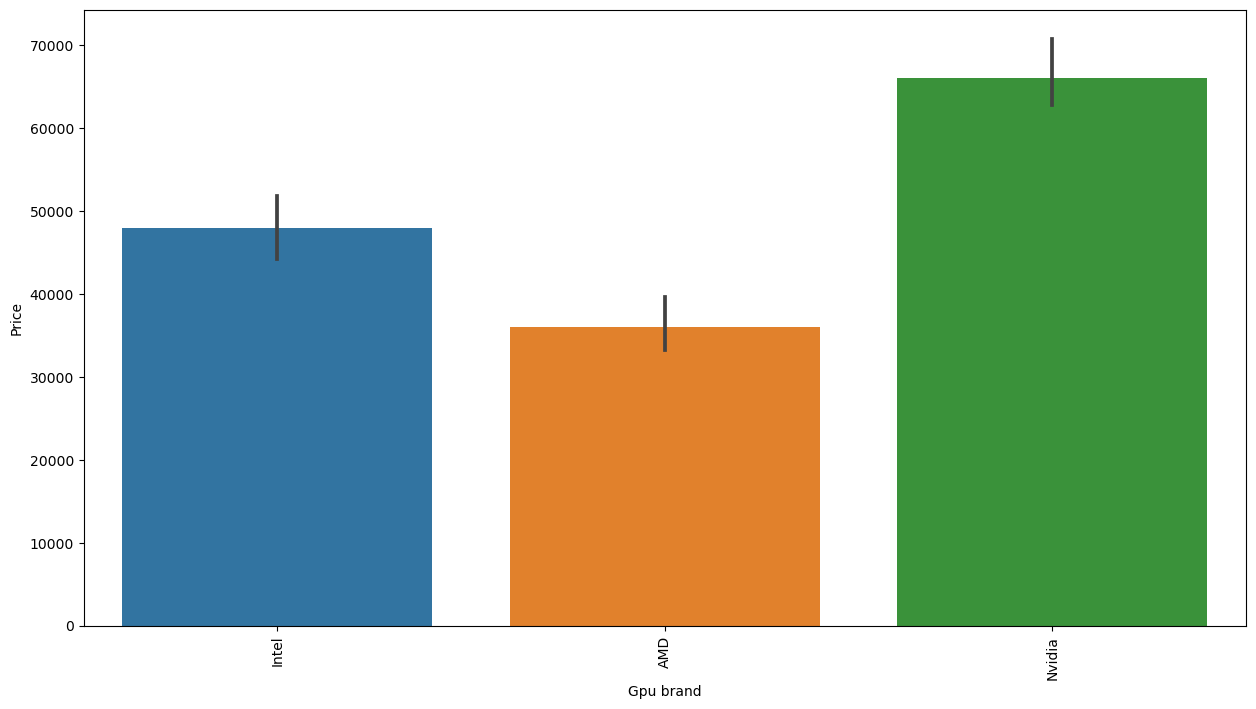

In [194]:
 sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [195]:
#Dropping the 'GPU' as created a new column "GPU brand".
df.drop(columns=['Gpu'],inplace=True)

In [196]:

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [197]:
 df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

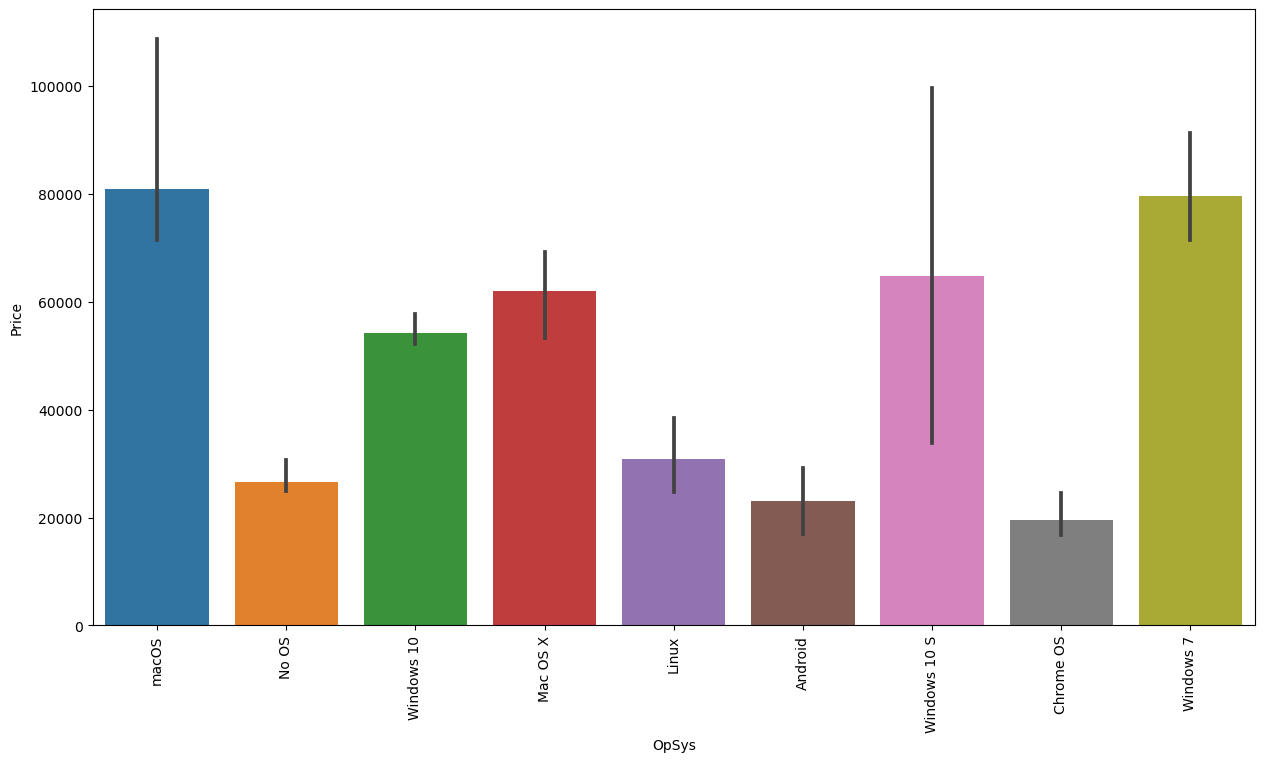

In [198]:
#Visualizing it 
sns.barplot(x=df['OpSys'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [199]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In the above code we are categorizing operating systems in a pandas dataframe, especially if the original OS labels are inconsistent or difficult to work with. For example, the function could be applied to a column of operating system names in a dataframe using the apply() function, and the resulting categories could be used for further analysis or visualization.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [200]:
#Here we are using 'apply()' function to create a new column named as 'os'.
df['os'] = df['OpSys'].apply(cat_os)

In [201]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [202]:
#Dropping the column."opsys" as a column is created as 'os'.
df.drop(columns=['OpSys'],inplace=True)

In [203]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


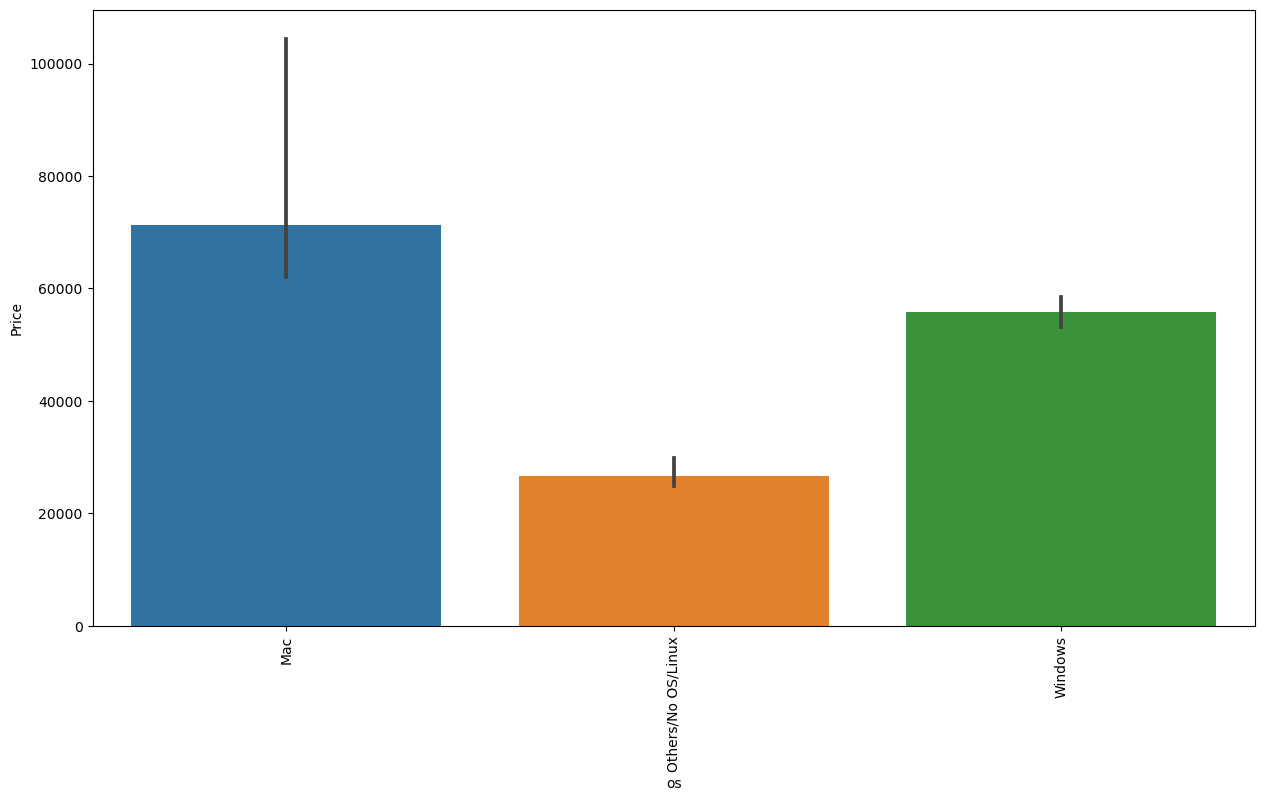

In [204]:
 sns.barplot(x=df['os'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Density'>

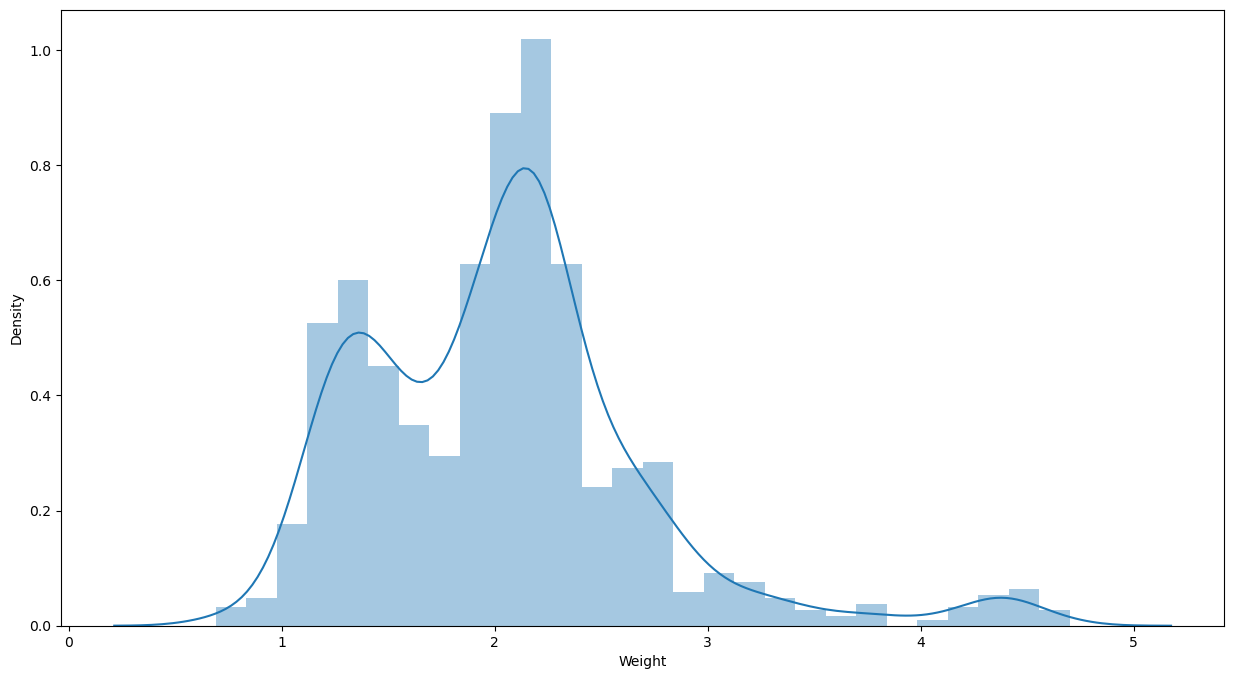

In [205]:
 sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

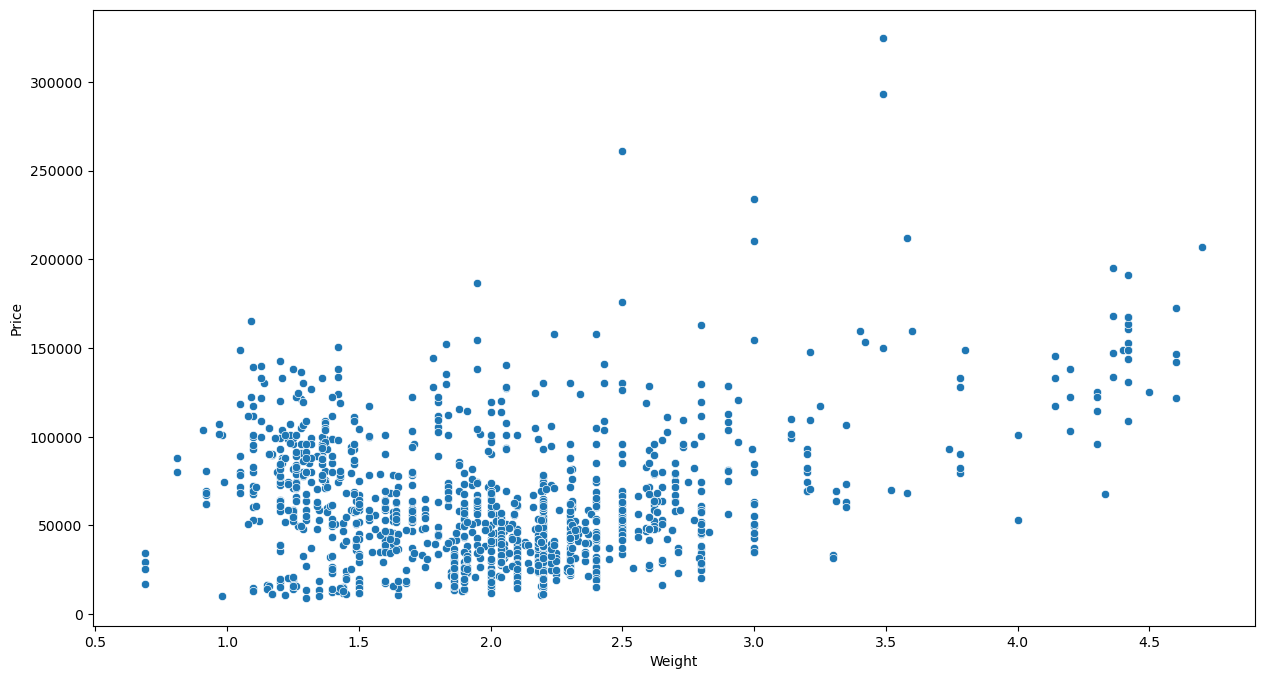

In [206]:
#Visualizing the scatter plot to see relationship between these two variables
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [207]:
#checking the correlation.
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

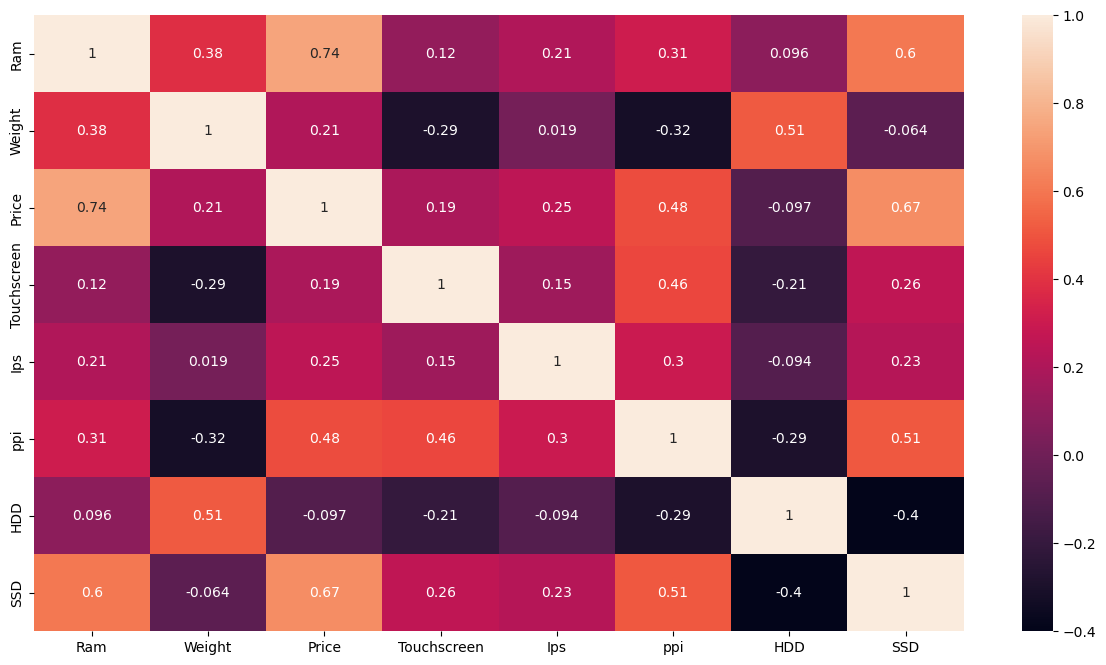

In [208]:
#Visualizing a heatmap for checking the correlation.
sns.heatmap(df.corr(),annot=True)


**4.2.1 Data Normalization**

Applying logrithmic Function on the target Variable['Price'] and Visualizing it.

<AxesSubplot:xlabel='Price', ylabel='Density'>

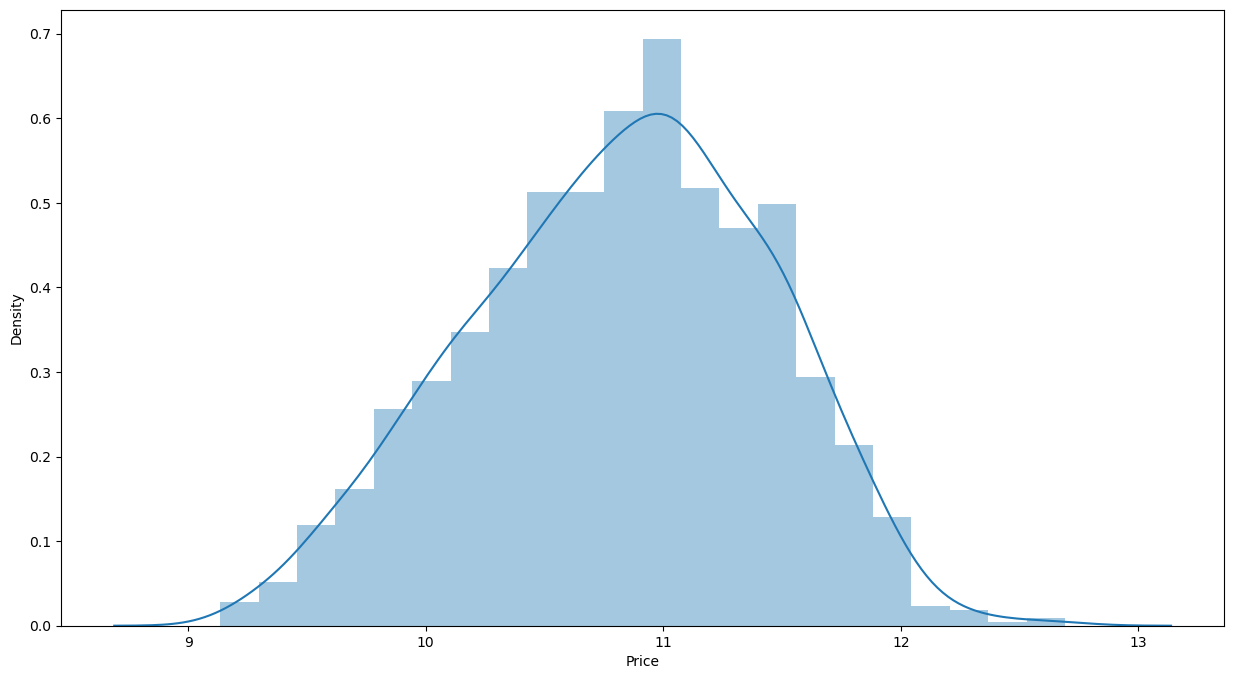

In [209]:
sns.distplot(np.log(df['Price']))

After Applying the the log Transformation the target variable become almost normal

**4.2.2 Dummy Encoding**

pd.get_dummies() is a pandas function that creates dummy variables for categorical features in a dataframe. 
The drop_first parameter is set to False, which means that the function will create dummy variables for all levels of each categorical feature.
If drop_first were set to True, the function would create dummy variables for all but one level of each categorical feature.

In [210]:
df=pd.get_dummies(df,drop_first=False)

In [211]:
#Displaying top head of dataframe.
df.head()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Others/No OS/Linux,os_Windows
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [212]:
df.shape

(1302, 44)

In [213]:
df.head()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Others/No OS/Linux,os_Windows
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [214]:
# add the intercept column using 'add_constant()'
df= sm.add_constant(df)

# print the first five oservations after adding intercept
df.head()

,const,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Others/No OS/Linux,os_Windows
0,1.0,8,1.37,71378.6832,0,1,226.983005,0,128,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,1.0,8,1.34,47895.5232,0,0,127.677940,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
2,1.0,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
3,1.0,16,1.83,135195.3360,0,1,220.534624,0,512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,1.0,8,1.37,96095.8080,0,1,226.983005,0,256,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [215]:

X = df.drop(columns=['Price'],axis=1)
y= np.log(df['Price'])

In [216]:
#Checking the shape of X.
X.shape


(1302, 44)

In [217]:
X_test.head(10)

,const,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_AMD Processor,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Others/No OS/Linux,os_Windows
1233,1.0,16,2.70,0,0,127.335675,1000,256,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1030,1.0,4,1.64,0,0,111.935204,0,256,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
163,1.0,16,2.50,0,1,141.211998,0,256,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1012,1.0,4,1.48,0,0,157.350512,0,256,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
711,1.0,8,1.64,0,0,157.350512,0,256,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
268,1.0,8,2.50,0,0,127.335675,1000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1132,1.0,4,1.50,0,0,111.935204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
982,1.0,6,2.20,0,0,141.211998,0,256,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
713,1.0,4,1.50,0,0,157.350512,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
903,1.0,8,1.13,0,1,157.350512,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1


In [218]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
5        9.967026
6       11.644108
7       11.030615
8       11.285443
9       10.621952
10       9.951658
11       9.819076
12      11.775302
13      10.187967
14      11.116331
15      11.301072
16      10.588945
17      11.933438
18      10.188167
19      10.862093
20       9.232535
21      10.882316
22       9.528521
23      10.683645
24      10.466285
25      10.012572
26      10.977717
27      10.660173
28      11.144141
29      10.773501
30       9.476778
31       9.268866
32      10.060060
33      11.508720
34      10.881314
35       9.493014
36       9.880923
37      10.862093
38      10.167289
39      10.754346
40       9.939140
41      11.288115
42      10.235123
43      10.500591
44      10.882316
45      11.233269
46       9.886358
47      11.144911
48      10.435465
49      10.119747
50       9.740752
51      10.710153
52       9.963243
53      10.981350
54       9.926204
55      10

In [219]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [220]:
print('The shape of X_train is:',X_train.shape)

print('The shape of X_test is:',X_test.shape)

print('The shape of y_train is:',y_train.shape)

print('The shape of y_test is:',y_test.shape)

The shape of X_train is: (911, 44)
The shape of X_test is: (391, 44)
The shape of y_train is: (911,)
The shape of y_test is: (391,)


**Linear Regression.**

In [221]:
# Create a linear regression object
lr = LinearRegression()

# Fit the linear regression model to your data
lr.fit(X, y)

LinearRegression()

In [222]:
# My model's parameters:
print('Model intercept: ', lr.intercept_)
print('Model coefficients: ', lr.coef_)

Model intercept:  9.88483051456452
Model coefficients:  [ 0.          0.02637647  0.07241558 -0.10065145  0.03529565  0.00246211
  0.00000054  0.00058666 -0.11702146  0.12036442 -0.02474724 -0.46535401
  0.03408583 -0.10100607  0.32853544  0.07604949 -0.07004142  0.33939331
 -0.01092256  0.10890031 -0.44905374  0.28338623  0.11923572  0.19707214
  0.18792985 -0.64910655  0.09230032  0.01339416 -0.00476572 -0.24651828
 -0.22267301  0.03477374  0.42578912 -0.16900595 -0.0688253   0.24010979
  0.29874265 -0.30102119 -0.0554875   0.02586155  0.02962594  0.12036442
 -0.17162715  0.05126272]


In [223]:
print('y = ' + str('%.2f' % lr.intercept_) + ' + ' + str('%.2f' % lr.coef_[0]) + '*X1 ' +  ' + ' +
      str('%.2f' % lr.coef_[1]) + '*X2 '+ ' + ' +  str('%.2f' % lr.coef_[2]) + '*X3 + ' +
      str('%.2f' % lr.coef_[3]) + '*X4 + ' + str('%.2f' % lr.coef_[4]) + '*X5')

y = 9.88 + 0.00*X1  + 0.03*X2  + 0.07*X3 + -0.10*X4 + 0.04*X5


This will print the equation of the linear regression model, where lr is the trained LinearRegression model object. The equation will have the form: y = intercept + coefficient1*X1 + coefficient2*X2 + coefficient3*X3 + coefficient4*X4 + coefficient5*X5. The coefficients and intercept will be formatted with two decimal places. Replace lr with the actual name of your trained LinearRegression model object.

In [224]:
y_pred = lr.predict(X_test)

In [225]:
y_pred

array([11.45038529, 10.70548944, 11.38499529, 10.80572046, 10.66172368,
       10.82394822,  9.90323944, 10.29344097, 10.01505696, 11.00009999,
       10.90844357, 10.87548136, 11.51848398, 11.35884689, 10.22348272,
       11.27489859, 11.13334069, 10.66114997, 10.97726657, 10.84262264,
       10.92451211, 10.82480209, 11.4749076 , 11.22521916, 10.06524693,
       11.08033632, 10.54847015, 10.36808946, 10.85242224, 11.15479654,
       10.13444031, 10.14392148, 10.39760478, 11.14309604, 10.44280771,
       10.6096816 , 10.39331411, 10.35862355, 11.00232107, 11.9072656 ,
       10.98632392, 10.27230599, 10.78703845, 10.7784935 , 11.12899576,
       11.46694415, 10.47365045, 11.6940195 , 10.93516205, 11.87446808,
        9.63844189, 10.94385213, 10.38841953, 11.33621786, 11.0863965 ,
       11.47992365, 11.10541019, 11.11349387, 10.95349915, 10.92657721,
       11.15605124, 11.68963366, 11.33122085, 11.59544797, 10.31988323,
       10.68792258, 10.45789982, 11.04129917, 11.21527726, 10.67

**1. Compute accuracy measures**

Now we calculate accuray measures Mean Absolute error, Mean Squared error and Root-mean-square-error (RMSE).

In [226]:
# Calculate MAE
# The mean absolute error represents the average of the absolute difference between the actual and the
# predicted values in the dataset

#Calculating MAE
lr_reg_MAE=metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Errror (MAE):',lr_reg_MAE)

#Calculating MSE
lr_reg_MSE=metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error (MSE):',lr_reg_MSE)

#Calculating RMSE
lr_reg_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE):',lr_reg_RMSE)

Mean Absolute Errror (MAE): 0.20204700371899562
Mean Squared Error (MSE): 0.06625983288204039
Root Mean Squared Error (RMSE): 0.2574098538946021


**1. Tabulate the results**

In [227]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE
# create a list of column names

cols=['Model','MAE','MSE','RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation=pd.DataFrame(columns=cols)

lr_reg_metrics=pd.Series({'Model':"Linear Regression",
                           'MAE':lr_reg_MAE,
                           'MSE':lr_reg_MSE,
                           'RMSE':lr_reg_RMSE
                          })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation=result_tabulation.append(lr_reg_metrics,ignore_index=True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Linear Regression,0.202047,0.06626,0.25741


In [228]:
# Fit an OLS regression model on the test data
lr= sm.OLS(y_train,X_train).fit()

In [229]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     123.7
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          4.18e-318
Time:                        03:36:45   Log-Likelihood:                -43.479
No. Observations:                 911   AIC:                             163.0
Df Residuals:                     873   BIC:                             345.9
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<a id='set_options'></a>
# 2. Building Knn Model.

In [230]:
# Create a k-NN regression object
knn = KNeighborsRegressor(n_neighbors=5)

In [231]:
# Fit the Regressor to your data
knn.fit(X, y)

KNeighborsRegressor()

In [232]:
# Evaluate the performance of the model
score = knn.score(X, y)

In [233]:
score

0.874032710058794

**2. Compute accuracy measures**

Now we calculate accuray measures Mean Absolute error, Mean Squared error and Root-mean-square-error (RMSE).

In [234]:
# Calculate MAE
# The mean absolute error represents the average of the absolute difference between the actual and the
# predicted values in the dataset

#Calculating MAE
knn_reg_MAE=metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Errror (MAE):',knn_reg_MAE)

#Calculating MSE
knn_reg_MSE=metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error (MSE):',knn_reg_MSE)

#Calculating RMSE
knn_reg_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE):',knn_reg_RMSE)

Mean Absolute Errror (MAE): 0.20204700371899562
Mean Squared Error (MSE): 0.06625983288204039
Root Mean Squared Error (RMSE): 0.2574098538946021


**2. Tabulate the results**

In [235]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE
# create a list of column names

cols=['Model','MAE','MSE','RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected

knn_reg_metrics=pd.Series({'Model':"K-Nearest Neigbour",
                           'MAE':knn_reg_MAE,
                           'MSE':knn_reg_MSE,
                           'RMSE':knn_reg_RMSE
                          })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation=result_tabulation.append(knn_reg_metrics,ignore_index=True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Linear Regression,0.202047,0.06626,0.25741
1,K-Nearest Neigbour,0.202047,0.06626,0.25741


<a id='set_options'></a>
# 3. Building Decision Tree.

In [236]:
# Create a decision tree regression object
dtr = DecisionTreeRegressor(max_depth=5)

In [237]:
# Fit the regression model to your data
dtr.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [238]:
# Use the model to make predictions on new data
y_pred = dtr.predict(X_test)

In [239]:
y_pred

array([11.48004897, 10.59312205, 11.48004897, 11.12806215, 10.94172684,
       10.66500973,  9.75424556, 10.13840284,  9.75424556, 11.30851425,
       10.94172684, 10.94172684, 11.58070938, 11.30851425, 10.13840284,
       11.48004897, 11.30851425, 11.12806215, 10.99051248, 11.12806215,
       10.94172684, 10.66500973, 11.48004897, 10.99051248, 10.13840284,
       11.48004897, 10.59312205, 10.43251789, 10.94172684, 11.30851425,
       10.13840284, 10.13840284, 10.13840284, 11.30851425, 10.58587734,
       10.43251789, 10.43251789, 10.21085513, 11.30851425, 11.48004897,
       10.98181509, 10.13840284, 10.59312205, 10.66500973, 11.30851425,
       11.7416909 , 10.59312205, 11.48004897, 10.43251789, 11.48004897,
        9.75424556, 10.99051248, 10.58587734, 11.48004897, 11.30851425,
       11.48004897, 11.30851425, 10.99051248, 10.99051248, 10.94172684,
       10.99051248, 11.48004897, 11.48004897, 11.48004897, 10.13840284,
       10.77124794, 10.43251789, 10.99051248, 11.30851425, 10.59

In [240]:
# Evaluate the performance of the model
score = dtr.score(X, y)

In [241]:
score

0.8331232889596878

**3. Compute accuracy measures**

Now we calculate accuray measures Mean Absolute error, Mean Squared error and Root-mean-square-error (RMSE).

In [242]:
# Calculate MAE,MSE,RMSE
# The mean absolute error represents the average of the absolute difference between the actual and the
# predicted values in the dataset


dtr_reg_MAE=metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Errror (MAE):',dtr_reg_MAE)

dtr_reg_MSE=metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error (MSE):',dtr_reg_MSE)

dtr_reg_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE):',dtr_reg_RMSE)

Mean Absolute Errror (MAE): 0.19863104242163632
Mean Squared Error (MSE): 0.06311467388935685
Root Mean Squared Error (RMSE): 0.25122633995932203


**3. Tabulate the results**

In [243]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE
# create a list of column names

cols=['Model','MAE','MSE','RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected

dtr_reg_metrics=pd.Series({'Model':"Decision Tree Regressor",
                           'MAE':dtr_reg_MAE,
                           'MSE':dtr_reg_MSE,
                           'RMSE':dtr_reg_RMSE
                          })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation=result_tabulation.append(dtr_reg_metrics,ignore_index=True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Linear Regression,0.202047,0.066260,0.257410
1,K-Nearest Neigbour,0.202047,0.066260,0.257410
2,Decision Tree Regressor,0.198631,0.063115,0.251226


<a id='set_options'></a>
# 4. Building Random Forest.

In [244]:
rfr = RandomForestRegressor()

# Fit the linear regression model to your data
rfr.fit(X, y)

RandomForestRegressor()

In [245]:
y_pred = rfr.predict(X_test)

In [246]:
y_pred

array([11.34167691, 10.82227748, 11.00853724, 11.20701098, 10.87827015,
       10.89603865,  9.63679605, 10.31987765,  9.67769106, 11.48342664,
       11.3244667 , 11.13497122, 11.6221213 , 11.26113639, 10.15242968,
       11.36613954, 11.27692351, 10.82140325, 10.99421618, 11.0635723 ,
       11.15154411, 10.78926184, 11.5216949 , 11.15633133,  9.85363334,
       11.13884715, 10.24616726, 10.30869433, 10.96975708, 11.32518806,
       10.38255957, 10.1275304 , 10.40251859, 11.72505385, 10.54481388,
       10.75274728, 10.6644327 , 10.12619374, 11.04480358, 11.54009077,
       10.90663056, 10.06556499, 10.59725043, 10.82255583, 11.24297693,
       11.85566671, 10.34270432, 11.3058835 , 10.81094112, 11.64043236,
        9.70953232, 10.8062075 , 10.57241215, 11.08604079, 11.29134319,
       11.49969304, 11.37352255, 10.99422107, 10.9187129 , 10.93878103,
       11.30557059, 11.61580488, 11.48407646, 11.86694959, 10.30297917,
       10.70356579, 10.43691375, 11.15043491, 11.57293661, 10.82

In [247]:
# Evaluate the performance of the model
score = rfr.score(X_train, y_train)

In [248]:
score

0.9821078995288203

**4. Compute accuracy measures**

Now we calculate accuray measures Mean Absolute error, Mean Squared error and Root-mean-square-error (RMSE).

In [249]:
# calculate MAE
rfr_reg_MAE=metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Errror (MAE):',rfr_reg_MAE)

# calculate MSE
rfr_reg_MSE=metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error (MSE):',rfr_reg_MSE)

# calculate RMSE
rfr_reg_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE):',rfr_reg_RMSE)

Mean Absolute Errror (MAE): 0.06416169483204934
Mean Squared Error (MSE): 0.007453198340982473
Root Mean Squared Error (RMSE): 0.08633190801194233


**4. Tabulate the results**

In [250]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE
# create a list of column names

cols=['Model','MAE','MSE','RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected

rfr_reg_metrics=pd.Series({'Model':"Random Forest Regressor",
                           'MAE':rfr_reg_MAE,
                           'MSE':rfr_reg_MSE,
                           'RMSE':rfr_reg_RMSE
                          })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation=result_tabulation.append(rfr_reg_metrics,ignore_index=True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Linear Regression,0.202047,0.066260,0.257410
1,K-Nearest Neigbour,0.202047,0.066260,0.257410
2,Decision Tree Regressor,0.198631,0.063115,0.251226
3,Random Forest Regressor,0.064162,0.007453,0.086332


<a id="conclusion"> </a>
# 6. Conclusion.

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Based on the metrics presented, the Random Forest Regressor model outperforms the other three models in terms of Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This indicates that the Random Forest Regressor model provides the most accurate predictions among the four models tested.
                        
Therefore, the best conclusion is that the Random Forest Regressor model is the most suitable for this particular task, and should be selected for deployment in a real-world scenario, assuming that it satisfies other requirements and constraints such as interpretability, computational efficiency, and scalability.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [251]:
import pickle

# Assuming that you have trained four models and stored them in variables named `model1`, `model2`, `model3`, and `model4`
models = {
    'model1': lr,
    'model2': knn,
    'model3': dtr,
    'model4': rfr
}

# Save the models to a file using pickle
with open('models.pkl', 'wb') as f:
    pickle.dump(models, f)

In [660]:
models

{'model1': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2a2636dc4f0>,
 'model2': KNeighborsRegressor(),
 'model3': DecisionTreeRegressor(max_depth=5),
 'model4': RandomForestRegressor()}